<a href="https://colab.research.google.com/github/arifulhaqshahed/pds_project_01-roll_11-/blob/main/Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
file_path = '/content/sample_data/imdb_top_1000.csv'

In [92]:
df = pd.read_csv(file_path)

In [93]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


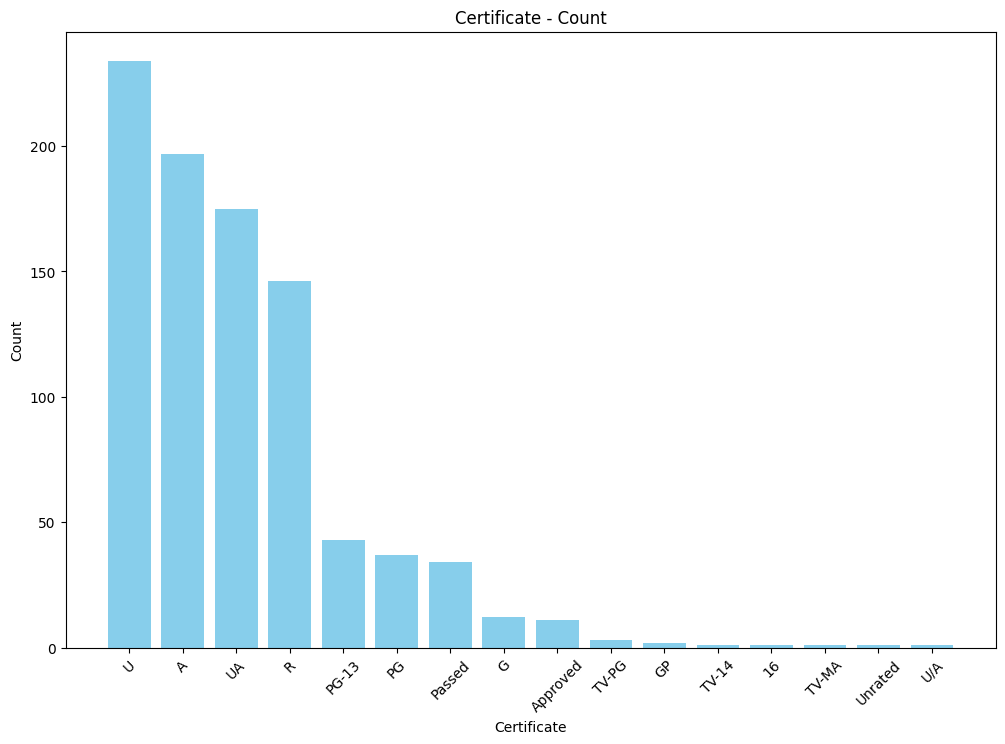

In [94]:
#count certificate occurrences
certificate_counts = df['Certificate'].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(certificate_counts.index, certificate_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.title('Certificate - Count')
plt.show()


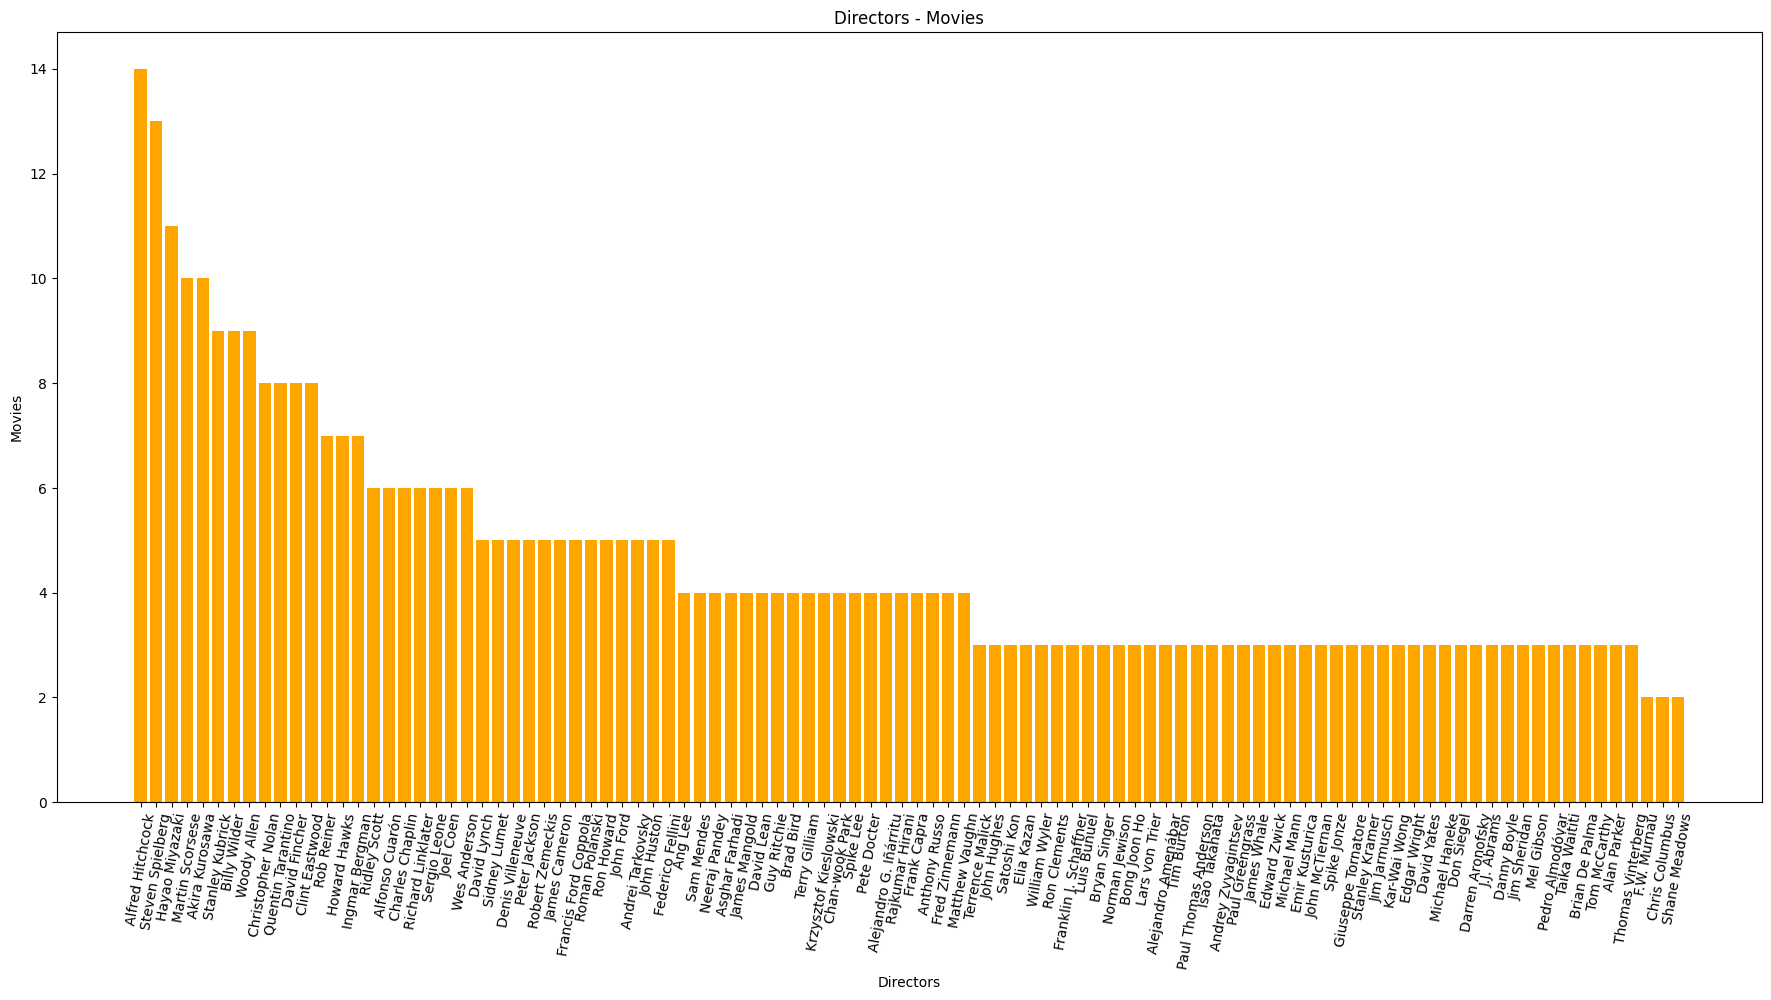

In [95]:
#count movies per director (top 100)
director_counts = df['Director'].value_counts().head(100)

plt.figure(figsize=(22, 10))
plt.bar(director_counts.index, director_counts.values, color='orange')
plt.xticks(rotation=80)
plt.xlabel('Directors')
plt.ylabel('Movies')
plt.title('Directors - Movies')
plt.show()


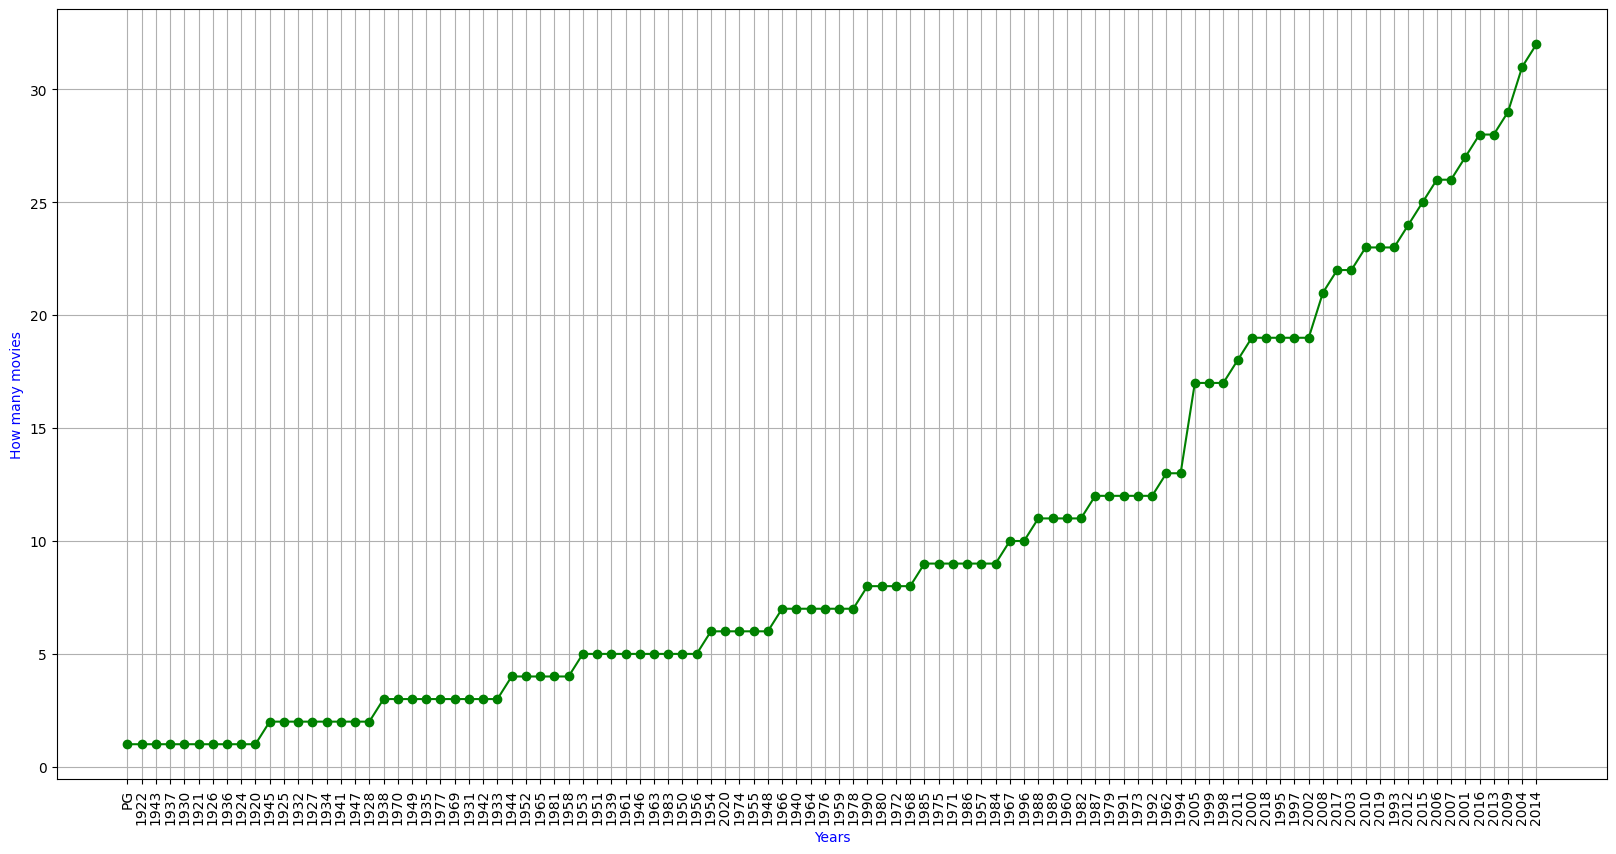

In [96]:
#count movies per year (sorted by count)
year_counts = df['Released_Year'].value_counts().sort_values()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='green')
ax.set_xlabel('Years', color='blue')
ax.set_ylabel('How many movies', color='blue')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [97]:
df_clean = df[['Overview', 'Genre']].dropna()

df_clean['Genre'] = df_clean['Genre'].apply(lambda x: x.split(',')[0])

In [98]:
df_clean

,Overview,Genre
0,Two imprisoned men bond over a number of years...,Drama
1,An organized crime dynasty's aging patriarch t...,Crime
2,When the menace known as the Joker wreaks havo...,Action
3,The early life and career of Vito Corleone in ...,Crime
4,A jury holdout attempts to prevent a miscarria...,Crime
...,...,...
995,A young New York socialite becomes interested ...,Comedy
996,Sprawling epic covering the life of a Texas ca...,Drama
997,"In Hawaii in 1941, a private is cruelly punish...",Drama
998,Several survivors of a torpedoed merchant ship...,Drama


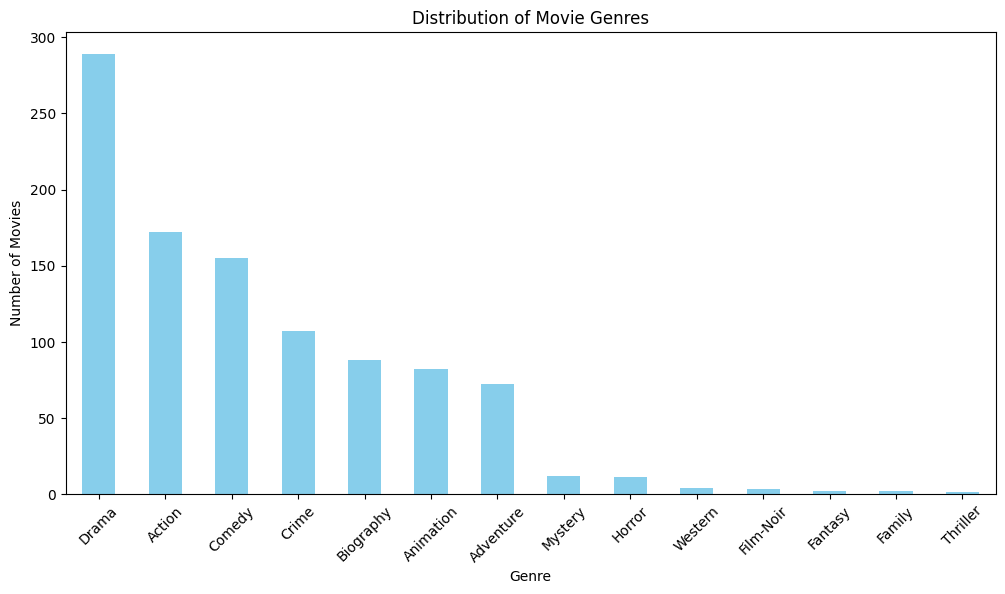

In [99]:
#count genre occurrences
genre_counts = df_clean['Genre'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_clean['Overview'])

In [102]:
X.shape

(1000, 5426)

In [103]:
y = df_clean['Genre']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [107]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [108]:
y_pred = nb_classifier.predict(X_test)

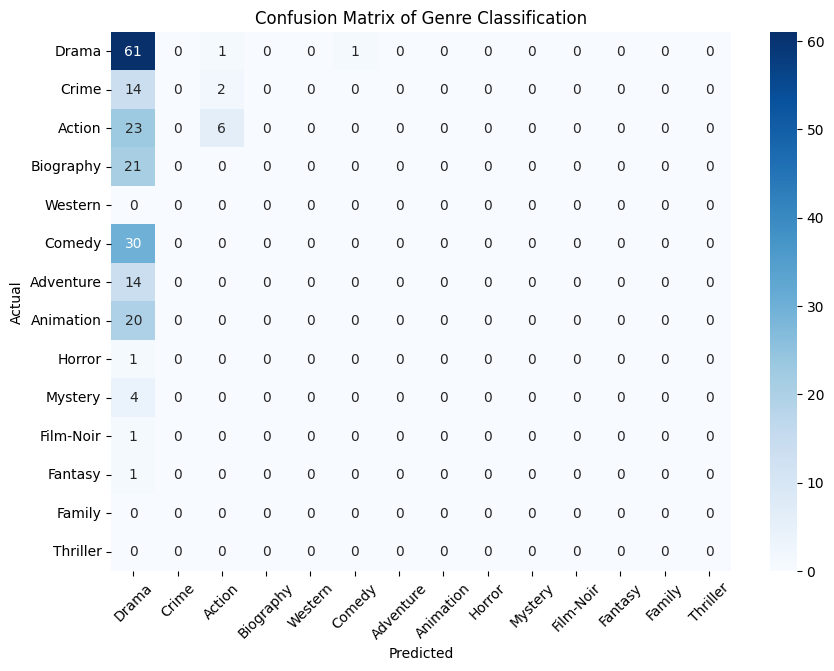

In [109]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=y.unique())

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix of Genre Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.show()


In [110]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [111]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

      Action       0.67      0.21      0.32        29
   Adventure       0.00      0.00      0.00        14
   Animation       0.00      0.00      0.00        20
   Biography       0.00      0.00      0.00        21
      Comedy       0.00      0.00      0.00        30
       Crime       0.00      0.00      0.00        16
       Drama       0.32      0.97      0.48        63
     Fantasy       0.00      0.00      0.00         1
   Film-Noir       0.00      0.00      0.00         1
      Horror       0.00      0.00      0.00         1
     Mystery       0.00      0.00      0.00         4

    accuracy                           0.34       200
   macro avg       0.09      0.11      0.07       200
weighted avg       0.20      0.34      0.20       200

